In [1]:
%run "Data Cleaning.ipynb"

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Using modes, an initial look at what kind of respondent did not get the vaccine, and what kind of respondent did get the vaccine.

In [3]:
#For My VS Code
pd.set_option("display.max_columns", None)

In [4]:
notvaccinated = df_clean_v1[df_clean_v1["seasonal_vaccine"] == 0.0]
notvaccinated.dropna()
notvaccinated = notvaccinated.drop("respondent_id", axis=1)
notvaccinated

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,seasonal_vaccine
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,0.0,0.0,NaN,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0
3,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,5.0,4.0,4.0,65+ Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,2.0,1.0,55 - 64 Years,< 12 Years,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,4.0,2.0,4.0,18 - 34 Years,College Graduate,White,Female,"> $75,000",Not Married,Rent,Not in Labor Force,fpwskwrf,"MSA, Principle City",3.0,0.0,0
26701,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,0
26702,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,0
26704,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,0


In [5]:
notvaccinated.mode()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,seasonal_vaccine
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,18 - 34 Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,0


In [6]:
vaccinated = df_clean_v1[df_clean_v1["seasonal_vaccine"] == 1.0]
vaccinated.dropna()
vaccinated = vaccinated.drop("respondent_id", axis=1)
vaccinated

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,seasonal_vaccine
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,1
6,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,1.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,1
9,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,5.0,4.0,4.0,45 - 54 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,lzgpxyit,"MSA, Not Principle City",2.0,0.0,1
10,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,1.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,oxchjgsf,Non-MSA,1.0,2.0,1
11,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,5.0,4.0,1.0,65+ Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lzgpxyit,"MSA, Not Principle City",1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26688,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,3.0,3.0,1.0,35 - 44 Years,12 Years,Black,Male,"> $75,000",Married,Own,Employed,lrircsnp,"MSA, Not Principle City",1.0,3.0,1
26692,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,5.0,2.0,2.0,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,1.0,0.0,1
26693,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN,4.0,2.0,2.0,55 - 64 Years,College Graduate,White,Female,"> $75,000",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,1
26697,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,35 - 44 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,atmpeygn,"MSA, Not Principle City",1.0,1.0,1


In [7]:
vaccinated.mode()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,seasonal_vaccine
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,5.0,4.0,1.0,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,1


EDA, focusing on Education.

In [8]:
df_clean_v1["seasonal_vaccine"].value_counts()

seasonal_vaccine
0    11639
1    10240
Name: count, dtype: int64

In [9]:
df_clean_v1["seasonal_vaccine"].value_counts(normalize=True)

seasonal_vaccine
0    0.531971
1    0.468029
Name: proportion, dtype: float64

~53% of the respondents received the influenza vaccine, while ~46% did not.

In [10]:
df_clean_v1["education"].value_counts()

education
College Graduate    9057
Some College        6205
12 Years            4763
< 12 Years          1854
Name: count, dtype: int64

In [11]:
df_clean_v1["opinion_seas_vacc_effective"].value_counts()

opinion_seas_vacc_effective
4.0    9851
5.0    8427
2.0    1827
1.0     931
3.0     819
Name: count, dtype: int64

1.0 = Very Low; 2.0 = Somewhat low; 3.0 = Don't know; 4.0 = Somewhat high; 5.0 = Very high.

Most respondents think its effective is somewhat high.

In [12]:
effective_median = df_clean_v1.groupby("education")["opinion_seas_vacc_effective"].median()
effective_median

education
12 Years            4.0
< 12 Years          4.0
College Graduate    4.0
Some College        4.0
Name: opinion_seas_vacc_effective, dtype: float64

In [13]:
got_vaxed = df_clean_v1.groupby("education")["seasonal_vaccine"].median()
got_vaxed

education
12 Years            0.0
< 12 Years          0.0
College Graduate    1.0
Some College        0.0
Name: seasonal_vaccine, dtype: float64

Despite most of the respondents thinking that the vaccine effectiveness is somewhat high, College Graduate is the only Education level that is likely to get the vaccine.

In [14]:
effective_counts = pd.crosstab(index=df_clean_v1["opinion_seas_vacc_effective"], columns=df_clean_v1["seasonal_vaccine"])
effective_counts

seasonal_vaccine,0,1
opinion_seas_vacc_effective,,
1.0,791,140
2.0,1570,257
3.0,585,234
4.0,6180,3671
5.0,2497,5930


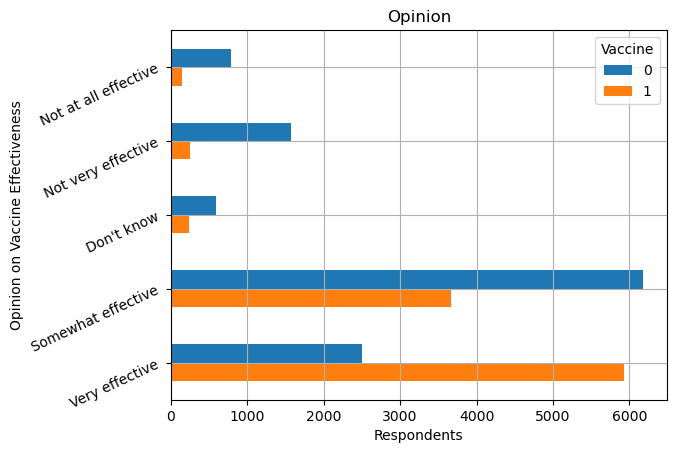

In [15]:
ax = effective_counts.plot.barh()
ax.invert_yaxis()
ax.set_ylabel("Opinion on Vaccine Effectiveness")
ax.set_yticklabels(["Not at all effective", "Not very effective", "Don't know", "Somewhat effective", "Very effective"], rotation=25)
ax.set_xlabel("Respondents")
ax.legend(title="Vaccine")
ax.set_title("Opinion")
plt.grid();

A visualization showing again that despite 6,000 respondents thinking that the vaccine effectiveness is somewhat high, they did not get the flu vaccine. However, the group that felt that the vaccine is very effective did get the vaccine.

In [16]:
risk_counts = pd.crosstab(index=df_clean_v1["opinion_seas_risk"], columns=df_clean_v1["seasonal_vaccine"])
risk_counts

seasonal_vaccine,0,1
opinion_seas_risk,,
1.0,3824,947
2.0,4801,2789
3.0,162,221
4.0,2213,4378
5.0,632,1894


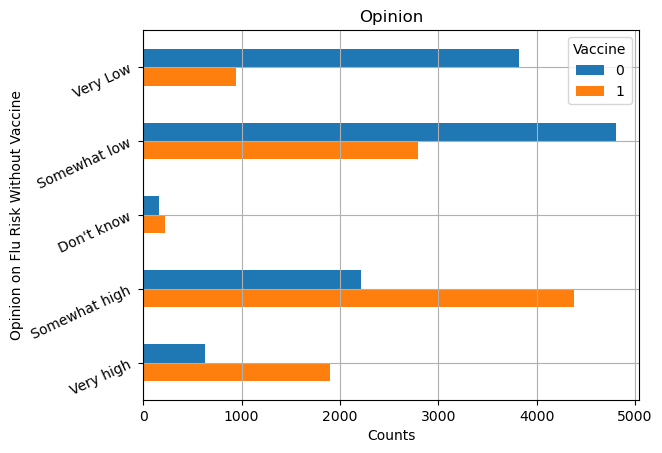

In [17]:
ax = risk_counts.plot.barh()
ax.invert_yaxis()
ax.set_ylabel("Opinion on Flu Risk Without Vaccine")
ax.set_yticklabels(["Very Low", "Somewhat low", "Don't know", "Somewhat high", "Very high"], rotation=25)
ax.set_xlabel("Counts")
ax.legend(title="Vaccine")
ax.set_title("Opinion")
plt.grid();

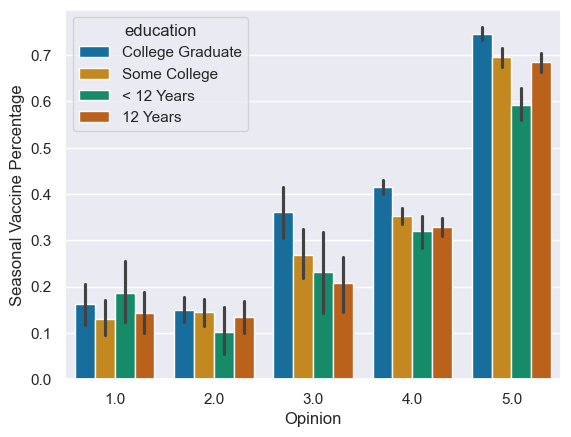

In [18]:
sns.set(style="darkgrid")
sns.barplot(df_clean_v1, x="opinion_seas_vacc_effective", y="seasonal_vaccine", hue="education", legend=True, palette="colorblind")
plt.xlabel("Opinion")
plt.ylabel("Seasonal Vaccine Percentage");

All Education levels have over a 50% of chance of getting that vaccine, in the order of College Graduate at the highest at 70%, then Some College, then 12 Years (High School Degree), then Under 12 Years (No High School Degree). This is the same Education level for somewhat effectiveness.

In [19]:
vs = pd.crosstab(index=df_clean_v1["education"], columns=df_clean_v1["seasonal_vaccine"])
vs

seasonal_vaccine,0,1
education,,
12 Years,2658,2105
< 12 Years,1099,755
College Graduate,4439,4618
Some College,3443,2762


In [20]:
vs["Percentage"] = vs[1] / (vs[1] + vs[0])
vs = vs.sort_values("Percentage", ascending=False)
vs

seasonal_vaccine,0,1,Percentage
education,,,
College Graduate,4439,4618,0.509882
Some College,3443,2762,0.445125
12 Years,2658,2105,0.441948
< 12 Years,1099,755,0.407228


/var/folders/r8/z6sbv4bn0d7c1qrrskxpsmmw0000gn/T/ipykernel_8878/2980176403.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=vs, x="Percentage", y=vs.index, orient="h", palette="colorblind")


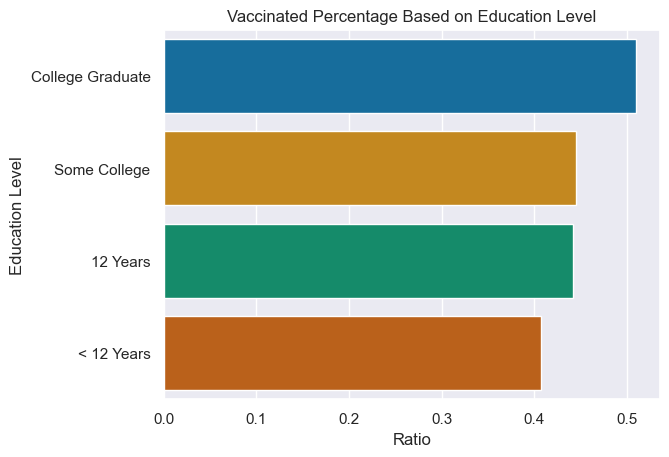

In [21]:
ax = sns.barplot(data=vs, x="Percentage", y=vs.index, orient="h", palette="colorblind")
ax.set_title("Vaccinated Percentage Based on Education Level")
ax.set(xlabel="Ratio", ylabel="Education Level");

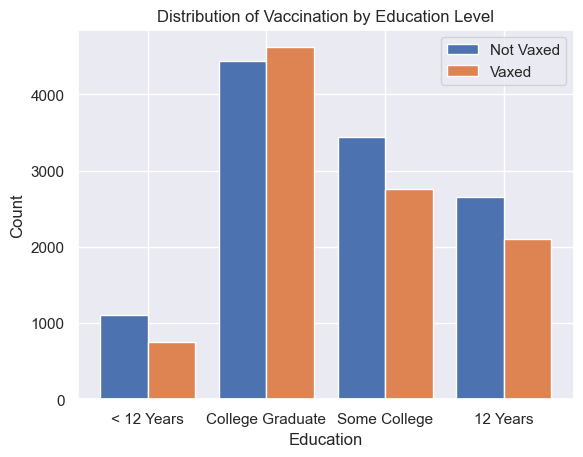

In [22]:
novax = df_clean_v1.loc[df_clean_v1["seasonal_vaccine"] == 0, "education"]
vax = df_clean_v1.loc[df_clean_v1["seasonal_vaccine"] == 1, "education"]

fig, ax = plt.subplots()

ax.hist(
    x=[novax, vax],
    align="left",
    label=["Not Vaxed", "Vaxed"],
    bins=[0,1,2,3,4],
)

ax.set_ylabel("Count")
ax.set_title("Distribution of Vaccination by Education Level")
ax.set_xlabel("Education")
ax.legend();